<a href="https://colab.research.google.com/github/edelgado-1975/PythonSena/blob/main/14a_PF_otros_conceptos%20ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

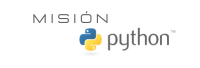

# Programación Funcional en Python


## Decoradores (Funciones Decoradoras)

Las funciones decoradoras envuelven la ejecución de otra función y permiten extender su comportamiento.  



Supongamos que queremos ampliar el comportamiento de una función existente cualquiera simplemente añadiendo una línea antes de su ejecución y otra línea despues de su normal ejecución.  El código sería algo así:

In [ ]:
def mi_decorador (funcion_a_decorar):  #creamos el decorador y recibe la funcion a decorar
    print ("inicio ___________________________") #extensión de funcionalidad (decoraciones)
    funcion_a_decorar()   #invocación de la función original
    print ("_______________________________fin") #extensión de funcionalidad (decoraciones)

def saludo():
  print ("Hola Mundo Decorador")

def despedida():
  print ("Adios Mundo Decorador")


mi_decorador(saludo)
mi_decorador(despedida)


Hasta este punto hemos logrado el objetivo, pero no hemos usado los decoradores.  

La sintaxis para crear un decorador es igual a la sintaxis para definir una función, por eso le llaman funciones decoradoras.  

La "invocación" de una función decoradora se hace con el signo **@** y el nombre de la función decoradora.  Esto se debe realizar justo antes de la declaración de la función a ser decorada.

Ya hemos usado decoradores antes en nuestros programas.  Recordemos algunos:

@classmethod

@staticmethod

@abstractmethod

Ahora aprenderemos a crear nuestros propios decoradores usando funciones decoradoras.

Sintaxis general:



```
def decorador (funcion):
  def decorar (parametros_funcion):
     #usamos y extendemos el comportamiento
     #de la funcion
  retornamos decorar


@decorador
def funcion_a_decorar():
   codigo de la funcion
```



Presentamos el mismo ejemplo, pero esta vez usando decoradores:

In [ ]:
import math
def mi_decorador (funcion_a_decorar):  #creamos el decorador y recibe la funcion a decorar
  def decoracion(*args): #funcion interna que extiende la funcionalidad (decora)
    print ("inicio ___________________________") #extensión de funcionalidad (decoraciones)
    funcion_a_decorar(*args)   #invocación de la función original
    print ("_______________________________fin") #extensión de funcionalidad (decoraciones)
  return decoracion  #retorno de la función decorada


@mi_decorador
def saludo(nombre):
  print ("Hola Mundo Decorador ", nombre)

@mi_decorador
def despedida():
  print ("Adios Mundo Decorador")

@mi_decorador
def mostrar_pi():
  print (math.pi)


saludo("Juan")
despedida()

#mostrar_pi()



Como podemos ver, en las líneas 8 y 12 se invoca al decorador (función decoradora) y la función que se declara inmediatamente después es la misma que se envía como parámetro.  De esta manera, las funciones originales (saludo() y despedida()) quedan decoradas fácilmente.

**Decorando funciones que reciben argumentos**

Podemos enviar los parámetros de la función a decorar como parámetros de la función interna de la función decoradora.  Miremos:

In [ ]:
def mi_decorador (funcion_a_decorar):
  def decoracion(nombre): #acá recibimos los parámetros de la función a decorar
    print ("inicio ___________________________")
    funcion_a_decorar(nombre)
    print ("_______________________________fin")
  return decoracion

@mi_decorador
def saludo(nombre):
  print ("Hola Mundo Decorador", nombre)

@mi_decorador
def despedida(nombre):
  print ("Adios Mundo Decorador", nombre)

saludo("juan")
#despedida("pedro")

Pero, qué ocurre si como es natural a la hora de crear decoradores, **no sabemos qué funciones los van a utilizar y mucho menos los parámetros que esas funciones van a tener?**  




---



In [ ]:
def mi_decorador (funcion_a_decorar):
  def decoracion(*args): #acá recibimos los parámetros de la función a decorar
    print ("inicio ___________________________")
    funcion_a_decorar(*args)
    print ("_______________________________fin")
  return decoracion

@mi_decorador
def saludo():
  print ("Hola")

@mi_decorador
def saludo_personal(nombre):
  print ("Hola", nombre)

@mi_decorador
def saludo_personal_formal(nombre, titulo_cortesia):
  print ("Hola", titulo_cortesia, nombre)

saludo()
saludo_personal("Carlos")
saludo_personal_formal("Diego", "Doctor")


**Cree una función decoradora que se invoque de la siguiente manera:**


---



```
@solopositivos
```
Este decorador se asegurará de que todos los parámetros que reciba la función decorada sean números positivos, en caso contrario, debe lanzar una excepción de tipo TypeError







In [ ]:
# realice la función decoradora en las siguientes líneas
def solopositivos(funcion):
  def interna(*args):
    for x in args:
      if not isinstance(x, (int, float)) or x < 0:
        raise TypeError("Al menos uno de los parámetros no es un número o es un número negativo")
    return funcion(*args)
  return interna


@solopositivos
def dividir(a, b):
  return a/b

@solopositivos
def sumar(x, y):
  print (x + y)

@solopositivos
def multiplicar(x, y):
  print (x * y)


print(dividir(4,1))


## Generadores (Funciones Generadoras)

Los generadores son funciones especiales que devuelven una secuencia de valores de uno en uno para ser usados.  Debido a que cada valor se produce en el momento en que se necesita, las funciones generadoras son una forma eficiente de gestionar grandes volúmenes de datos.  Las funciones generadoras crean un Iterable a través del cual se puede acceder a los valores generados.

La sintaxis para crear un generador es simplemente dentro de la función, anteceder el valor generado por la palabra reservada **yield** de esta manera la función sabrá que dicho valor no es retornado como el resultado que arroja la función sino como un valor de la secuencia que se genera cada vez que se itera sobre la función.  Miremos

In [ ]:
def generador_de_pares(cantidad):
  for x in range(cantidad):
    if x % 2 == 0:
      yield x   #Acá se crea el generador donde cada número generado es un número par

Para hacer uso del generador, debemos usar este como un Iterable tradicional.  

In [ ]:
def generador_de_pares(cantidad):
  for x in range(2, cantidad):
    if x % 2 == 0:
      yield x

mi_iterador = generador_de_pares(20)
print (type(mi_iterador))
print (mi_iterador)
print (next(mi_iterador))
print (next(mi_iterador))


In [ ]:
print (next(mi_iterador))

También podemos acceder a los valores generados dentro de un ciclo como si se tratara del uso de la función range()

In [ ]:
def generador_de_pares(cantidad):
  for x in range(cantidad):
    if x % 2 == 0:
      yield x

for num in generador_de_pares(20):
  print (num)

Supongamos que queremos una función que nos devuelva los primeros N números primos.  Una forma de realizarla sería la siguiente:


In [ ]:
def primos(n):
  def es_primo(num):
    for x in range (2, num):
      if num % x == 0:
        return False
    return True

  lista = []
  for num in range(2, n+1):
    if es_primo(num):
      lista.append(num)
  return lista

print (primos(100000))

La solución anterior crea una lista con todos los números primos.  Ocupando una gran cantidad de memoria al mismo tiempo.  La cantidad de memoria usada depende directamente del parámetro N ingresado.  

Miremos esta misma solución con generadores:

In [ ]:
def primos(n):
  def es_primo(num):
    for x in range (2, num):
      if num % x == 0:
        return False
    return True

  #lista = []  No necesito una lista
  for num in range(2, n+1):
    if es_primo(num):
      #lista.append(num)
      yield num #Acá generamos el número primo y lo entregamos sobre pedido
  #return lista

for p in primos(100000):
  print (p)

Si quisiera procesar cada número primo de la secuencia, el trabajo con generadores sería más eficiente ya que solo entrega el número primo de la secuencia cuando se le solicita, sin ocupar una gran memoria.

El uso de generadores es más eficiente en términos de uso de memoria y procesamiento de datos cuando:


*   Se trabaja con grandes conjuntos de datos
*   Se requiere la generación infinita de valores
*   Se trabaja con conjuntos de datos que no se pueden almacenar completamente en la memoria





**Cree un generador que reciba un texto y genere cada uno de los caracteres que solo se encuentran una vez en el texto**  Luego utilice ese generador dentro del programa principal para comprobar su funcionamiento.


---



In [ ]:
def unicas_letras(texto):
  for x in texto:
    if texto.count(x) == 1:
      yield x

for a in unicas_letras(input("ingrese texto")):
  print (a)

## List Comprehensions (comprensión de listas)

Podemos crear listas con los valores generados a partir de otros objetos iterables de una forma concisa y eficiente.  Generalmente necesitaremos de una sola línea para ello.  Esto lo denominamos comprensión de listas.  Miremos:
  

Queremos una función que reciba un número y devuelva una lista con los números pares comprendidos entre 1 y el número recibido.

**Sin comprensión de listas:**

In [ ]:
def pares(num):
  par = []
  for n in range(1, num+1):
    if n % 2 == 0:
      par.append(n)
  return par

print(pares(20))

**Con comprensión de listas**

In [ ]:
def pares (num):
  #return  list(x for x in range(1,num+1) if x % 2 == 0)
  return  [ for n in range(1,num+1)]

print (pares(20))

Como podemos apreciar en este sencillo ejemplo, pasamos de 5 líneas de código a solo 1 línea de código usando la comprensión de listas.

La sintaxis en la comprensión de listas es la siguiente:


```
[expresion for variable in iterable]
```
La condición es opcional,  en caso de existir, la sintaxis sería:


```
[expresion for variable in colección if condición]
```

Crear e imprimir una lista con los primeros 10 números

In [ ]:
x = [i for i in range (1,11)]
print(type(x))
print (x)

Crear e imprimir una lista con los números múltiplos de 3 que se encuentran entre el 1 y el 100

In [ ]:
res = [x for x in range(1,10) if x % 3 == 0 and x > 5 ]
print (res)

El iterable del for puede ser de cualquier tipo, no solamente de tipo range.  Miremos:

Ejemplo Iterable tipo lista:

In [ ]:
lista = [2,5,6,8,9,0,11,4]
res = [x for x in lista if x % 2 == 0]
print (res)

Ejemplo Iterable tipo tupla:

In [ ]:
tupla = (2,5,6,8,9,0,11,4)
res = [x for x in tupla if x % 2 == 0 else "a"]
print (res)

In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

even_odd = ['even' for num in numbers if num % 2 == 0 else 'odd']

print(even_odd)

Ejemplo Iterable tipo conjunto:

In [ ]:
conjunto = {2,5,6,8,9,0,11,4}
res = [x for x in conjunto if x % 2 == 0]
print (res)

Ejemplo Iterable tipo diccionario:

In [ ]:
diccionario = {1:2, 2:5, 3:6, 4:8, 5:9, 6:0, 7:11, 8:4}
res = [x for x in diccionario.values() if x % 2 == 0]
print (res)

Ejemplo Iterable tipo generador

In [ ]:
def gen():
  for i in range(10):
    yield i

generador = gen()
res = [x for x in generador if x % 2 == 0]
print (res)

**Cree una función que reciba un diccionario cuyas llaves son los nombres de estudiantes y valores sus edades.  Esta función debe retornar una lista por comprensión con los nombres de los estudiantes menores de edad.**


---



In [ ]:
def funcion1(estudiantes):
  return list([est for est in estudiantes.keys() if estudiantes[est] < 18])

dicc = {"juan":20,"luis":10,"diego":24,"lina":16,"carlos":17}
print (funcion1(dicc))

**Cree una función que reciba una lista de palabras y retorne una lista por comprensión de la longitud de cada palabra.  Ejemplo, si la lista que recibe es ["casa", "uno", "radioactiva"] la lista devuelta debe ser   [4, 3, 11]**


---



In [ ]:
def devolver_longitud_palabras(palabras):
  return [len(palabra)  for palabra in palabras]

print (devolver_longitud_palabras(["sena", "armenia", "comida"]))

**Crear una lista por comprensión de números pares a partir de otra lista por comprensión creada con las potencias de 2 de los primeros 10 números.  Use una sola línea de código para crear las listas y comprobarlas**


---



In [ ]:
print([x for x in [num**2 for num in range(1,11)]if x % 2 == 0])

Las listas por comprensión no solo generan listas, de manera análoga pueden generar otros tipos de colecciones.

Ejemplo generando una tupla:

In [ ]:
mi_tupla = tuple(x for x in range (10))
print (type(mi_tupla))
print (mi_tupla)

Ejemplo generando un conjunto:

In [ ]:
mi_conjunto = {x for x in range (10)}
print (type(mi_conjunto))
print (mi_conjunto)

Ejemplo generando un diccionario:

In [ ]:
mi_diccionario = {x: chr(x) for x in range (97,123)}
print (type(mi_diccionario))
print (mi_diccionario)

**Cree una función que reciba dos listas (nombres y telefonos) la función debe retornar un diccionario por comprensión con los nombres como llaves y los teléfonos como valores siempre y cuando las listas recibidas de nombres y teléfonos tengan la misma cantidad de elementos, en caso contrario generar una excepción de tipo ValueError**


---



Le han dado el siguiente código que permite generar una lista con las posibles combinaciones de los nombres de las personas de una listas de nombres dada

In [ ]:
def combinar_nombres(nombres):
  nombres_compuestos=[]
  for nombre1 in nombres:
      for nombre2 in nombres:
          if nombre1!=nombre2:
              nombres_compuestos.append([nombre1, nombre2])
  return nombres_compuestos

nombres=['Andres','Julian','Mauricio','Felipe']
print(combinar_nombres(nombres))

In [ ]:
print ([nombre1 + " " +nombre2 for nombre1 in ["Paula", "Maria", "Laura"] for nombre2 in ["Paula", "Maria", "Laura"] if nombre1 != nombre2 ])


**Se le pide que optimice el código generando la lista con la combinación de nombres mediante list comprehensions**


---

